#### ASSUMPTION : We will be using list class and assume that the right end of the list is 'top' of our 'stack'

In [1]:
"""This is an implementation of stack abstract data type.
Stack is based on LIFO principle. i.e The element/item which is inserted
at last is the one eligible to move out first.
.. moduleauthor: Sijan Bhandari <sijanonly@gmail.com>
"""


class Stack():
    """This is a class which represents a stack.

    Attributes:
        elements (list): All items for stack will be stored in elements.
    """
    def __init__(self):
        """Constructor of the Stack Class.
        """
        self.elements = []

    def isEmpty(self):
        """Checks if the stack is empty or not.

        Returns:
            bool: If the size of the stack is zero,
            the stack will of length zero.
        """
        return self.size() == 0

    def size(self):
        """Returns the size of the stack.

        Returns:
            int: The total count of the elements in the stack.
        """
        return len(self.elements)

    def push(self, elm):
        """Inserts a new element to stack.

        Args:
            elm (ANY): Stack can save any type of elements.
        """
        self.elements.append(elm)

    def pop(self):
        """Fetch out the recent/last inserted element from stack.
           Also, the element will be removed from the stack.

        Returns:
            ANY: The outermost item of the stack.
        """
        return self.elements.pop()

    def peek(self):
        """Same as pop operation but the element is remain unchanged.

        Returns:
            ANY: The outermost item of the stack.
        """
        return self.elements[self.size() - 1]


In [32]:
stack = Stack()

In [33]:
stack.isEmpty()


True

In [35]:
stack.push(2)

In [36]:
stack.isEmpty()

False

In [37]:
stack.size()

2

In [38]:
stack.peek()

2

In [39]:
stack.size()

2

In [40]:
stack.push(4)

In [41]:
stack.elements

[2, 2, 4]

### Implementations

#### 1. Reverse String  characters with STACK implementation.

In [32]:
def reverseString(word):
    """Reverse the order of characters from any given string.

    Args:
        word (string): The word to be reversed.

    Returns:
        string: The reversed word/string of the given string.
    """
    stack_rev = Stack()
    for each_item in word:
        stack_rev.push(each_item)
    reverse_string = ''
    while not stack_rev.isEmpty():
        reverse_string += stack_rev.pop()

    return reverse_string

In [33]:
reverseString('sijan')

'najis'

#### 2. Check Balanced parentheses  of a mathematical expression (checking only for small parentheses)

In [37]:
def checkBalancedSmallBraces(expression):
    """Check whether a mathematical expression is balanced or not.

    Args:
        expression (string): The string to be checked.

    Returns:
        bool: If the expression is balanced,
        it will return True otherwise False.
    """
    i = 0
    stack_paren = Stack()
    balanced = True
    while i < len(expression):
        if expression[i] == '(':
            stack_paren.push(expression[i])
        else:
            if stack_paren.isEmpty():
                balanced = False
            else:
                stack_paren.pop()

        i = i + 1
    if stack_paren.isEmpty() and balanced:
        return True
    else:
        return False


In [38]:
checkBalancedSmallBraces('()')

True

In [39]:
checkBalancedSmallBraces('(((())))))')

False

#### 3.  Check Balanced parentheses of a mathematical expression (checking for all symbols '({[' 

In [47]:


def matchSymbol(open_sym, close_sym):
    """Check if the open symbol and close symbol are of same kind.

    Args:
        open_sym (string): Opening mathematical expression
        close_sym (string): Closing mathematical expression

    Returns:
        bool: If the open_sym and close_sym are similar kind,
        it will return True otherwise False.
    """
    open_expression = '({['
    close_expression = ']})'
    return open_expression.index(open_sym) == close_expression.index(close_sym)


def checkBalancedSymbols(expression):
    """Check if the given expression is balanced mathematical expression or not.

    Args:
        expression (string): Expression to be checked.

    Returns:
        bool: If the given mathematical expression is balanced,
        it will return True otherwise False.
    """
    i = 0
    balanced = True
    stack_symbol = Stack()
    for elm in expression:
        if elm in '({[':
            stack_symbol.push(elm)
        else:
            if stack_symbol.isEmpty():
                balanced = False
            else:
                open_symbol = stack_symbol.pop()
                close_symbol = elm
                if matchSymbol(open_symbol, close_symbol):
                    balanced = True
    if stack_symbol.isEmpty() and balanced:
        return True
    else:
        return False


In [48]:
checkBalancedSymbols('({{[]}})')

True

In [49]:
checkBalancedSymbols('[{]')

False

#### 4. Convert Decimal to binary numbers

In [4]:
def decimalToBinary(decimal_number):
    """Convert given decimal number to binary number.

       Here, we use remainder operator to store the rem. to our stack.
       And, at the same time the given decimal number is being
       reduced to half since '2' act as a base value for
       binary conversion.
       '//' is being used to performs integer division.

    Args:
        decimal_number (int): Decimal number to be converted to binary

    Returns:
        str: Binary representation of given decimal number.
    """
    binary_string = ""
    stack_bin = Stack()
    while decimal_number:
        remainder = decimal_number % 2
        stack_bin.push(remainder)
        decimal_number = decimal_number // 2
    while not stack_bin.isEmpty():
        binary_string += str(stack_bin.pop())
    return binary_string


In [5]:
decimalToBinary(4)

'100'

In [6]:
decimalToBinary(111)

'1101111'

In [24]:
%matplotlib inline
from matplotlib import pyplot

import random
import timeit
from functools import partial
def plot_time_complexity(fn, min_value, max_value, size, no_of_tests):
    """
    Plotting time complexity based on given function.
    """
    x = []
    y = []

    for i in random.sample(range(min_value, max_value),k=size):
        N = i
        timer = timeit.Timer(partial(fn, N))
        t = timer.timeit(number=no_of_tests)
        x.append(i)
        y.append(t)
    p1 = pyplot.plot(x, y, 'o', label = fn.__name__)
    pyplot.legend(loc='upper left')
    pyplot.xlabel('data size', fontsize=18)
    pyplot.ylabel('execution time', fontsize=16)

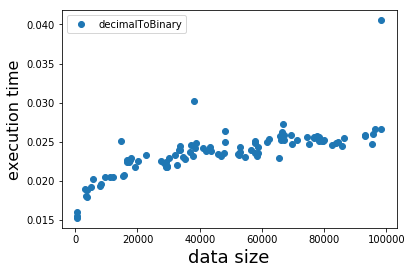

In [25]:
plot_time_complexity(decimalToBinary, 10, 100000, 100, 1000)